In [1]:
import numpy as np
from astropy.table import Table, vstack, join, setdiff
from matplotlib import pyplot as plt

from psrcrf_tools import *

np.random.seed(3141592654)

/Users/Neo/Scisoft/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Timing positional precision for Gaia pulsar sample

In [2]:
timing_gaia = Table.read("../data/timing_edr3.fits")

pos_err = np.sqrt(timing_gaia["ra_err"]**2 + timing_gaia["dec_err"]**2)
timing_gaia.add_column(pos_err, name="pos_err")

timing_gaia.keep_columns(["psr_name", "pos_err"])

In [3]:
psr_name = []
pos_err = []

for psr in np.unique(timing_gaia["psr_name"]):
    psr_name.append(psr)

    temp = timing_gaia[timing_gaia["psr_name"] == psr]
    pos_err.append(np.min(temp["pos_err"]))

timing_gaia = Table([psr_name, pos_err], names=["psr_name", "pos_err"])

pos_err_all_g = np.median(timing_gaia["pos_err"])
pos_min_all_g = np.min(timing_gaia["pos_err"])

Find the MSP list.

In [4]:
edr3_antf_table = Table.read("../data/edr3_psrcatv1.67.fits")

B_over_G = 3.2e19 * np.sqrt(edr3_antf_table["p0"] * edr3_antf_table["p1"])

mask = (B_over_G <= 1e10)
gaia_msp_list = edr3_antf_table["name"][mask]

gaia_msp_list = Table([gaia_msp_list], names=["psr_name"])

In [5]:
timing_gaia_msp = join(timing_gaia, gaia_msp_list, keys="psr_name")
pos_err_msp_g = np.median(timing_gaia_msp["pos_err"])
pos_min_msp_g = np.min(timing_gaia_msp["pos_err"])

timing_gaia_nmp = setdiff(timing_gaia, gaia_msp_list, keys="psr_name")
pos_err_nmp_g = np.median(timing_gaia_nmp["pos_err"])
pos_min_nmp_g = np.min(timing_gaia_nmp["pos_err"])

In [6]:
print("For Gaia pulsar sample:")
print("        :  Median        Best")
print("All     :  {:7.3f} mas {:7.3f} mas".format(
    pos_err_all_g, pos_min_all_g))
print("MSP     :  {:7.3f} mas {:7.3f} mas".format(
    pos_err_msp_g, pos_min_msp_g))
print(
    "Non-MSP :  {:7.3f} mas {:7.3f} mas".format(pos_err_nmp_g, pos_min_nmp_g))

For Gaia pulsar sample:
        :  Median        Best
All     :   30.092 mas   0.005 mas
MSP     :    2.256 mas   0.005 mas
Non-MSP :  627.651 mas  10.814 mas


# Timing positional precision for VLBI pulsar sample

In [7]:
timing_vlbi = Table.read("../data/timing_vlbi.fits")

pos_err = np.sqrt(timing_vlbi["ra_err"]**2 + timing_vlbi["dec_err"]**2)
timing_vlbi.add_column(pos_err, name="pos_err")

timing_vlbi.keep_columns(["psr_name", "pos_err"])

In [8]:
psr_name = []
pos_err = []

for psr in np.unique(timing_vlbi["psr_name"]):
    psr_name.append(psr)

    temp = timing_vlbi[timing_vlbi["psr_name"] == psr]

    pos_err.append(np.min(temp["pos_err"]))

pos_err_all_v = np.median(timing_vlbi["pos_err"])
pos_min_all_v = np.min(timing_vlbi["pos_err"])

In [9]:
vlbi_msp_list = Table([["J1022+1001", "J2010-1323", "J2145-0750",
                      "J2317+1439", "J1012+5307", "J1537+1155"]], names=["psr_name"])

In [10]:
timing_vlbi_msp = join(timing_vlbi, vlbi_msp_list, keys="psr_name")
pos_err_msp_v = np.median(timing_vlbi_msp["pos_err"])
pos_min_msp_v = np.min(timing_vlbi_msp["pos_err"])

timing_vlbi_nmp = setdiff(timing_vlbi, vlbi_msp_list, keys="psr_name")
pos_err_nmp_v = np.median(timing_vlbi_nmp["pos_err"])
pos_min_nmp_v = np.min(timing_vlbi_nmp["pos_err"])

In [11]:
print("For VLBI pulsar sample:")
print("        :  Median        Best")
print("All     :  {:7.3f} mas {:7.3f} mas".format(
    pos_err_all_v, pos_min_all_v))
print("MSP     :  {:7.3f} mas {:7.3f} mas".format(
    pos_err_msp_v, pos_min_msp_v))
print(
    "Non-MSP :  {:7.3f} mas {:7.3f} mas".format(pos_err_nmp_v, pos_min_nmp_v))

For VLBI pulsar sample:
        :  Median        Best
All     :  133.844 mas   0.074 mas
MSP     :    0.678 mas   0.074 mas
Non-MSP :  195.170 mas  14.726 mas


# For all pulsar sample

In [12]:
timing_tab = vstack((timing_gaia, timing_vlbi))

msp_list = vstack((gaia_msp_list, vlbi_msp_list))

In [13]:
psr_name = []
pos_err = []

for psr in np.unique(timing_tab["psr_name"]):
    psr_name.append(psr)

    temp = timing_tab[timing_tab["psr_name"] == psr]

    pos_err.append(np.min(temp["pos_err"]))

pos_err_all_t = np.median(timing_tab["pos_err"])
pos_min_all_t = np.min(timing_tab["pos_err"])

In [14]:
timing_msp = join(timing_tab, msp_list, keys="psr_name")
pos_err_msp_t = np.median(timing_msp["pos_err"])
pos_min_msp_t = np.min(timing_msp["pos_err"])

timing_nmp = setdiff(timing_tab, msp_list, keys="psr_name")
pos_err_nmp_t = np.median(timing_nmp["pos_err"])
pos_min_nmp_t = np.min(timing_nmp["pos_err"])

In [15]:
print("For All pulsar sample:")
print("        :  Median        Best")
print("All     :  {:7.3f} mas {:7.3f} mas".format(
    pos_err_all_t, pos_min_all_t))
print("MSP     :  {:7.3f} mas {:7.3f} mas".format(
    pos_err_msp_t, pos_min_msp_t))
print(
    "Non-MSP :  {:7.3f} mas {:7.3f} mas".format(pos_err_nmp_t, pos_min_nmp_t))

For All pulsar sample:
        :  Median        Best
All     :  131.816 mas   0.005 mas
MSP     :    0.678 mas   0.005 mas
Non-MSP :  208.588 mas  10.814 mas


# Simulation

In [16]:
def normal_dist(sigma, num):

    mu = sigma
    sig = sigma / 10

    data = np.random.normal(mu, sig, num)

    return data

In [17]:
def frame_tie_sim(data_tab, sigma, nb_sim=1000):

    nb_psr = len(data_tab)

    # Store sigma
    sigma_mat = np.zeros((nb_sim, 3))

    # Degree to radian
    ra = np.deg2rad(data_tab["ra"])
    dec = np.deg2rad(data_tab["dec"])

    for i in range(nb_sim):
        # Simulate the formal uncertainties of Timing position
        ra_err_t = normal_dist(sigma, nb_psr)
        dec_err_t = normal_dist(sigma, nb_psr)

        # Total formal uncertainty
        dra_err = np.sqrt(data_tab["ra_err"]**2 + ra_err_t**2)
        ddec_err = np.sqrt(data_tab["dec_err"]**2 + dec_err_t**2)

        sigma_mat[i, :] = calc_pmt_sig(ra, dec, dra_err, ddec_err)

    return sigma_mat

In [18]:
# gaia_tab = Table.read("../data/edr3_psrcatv1.65.fits")
gaia_tab = Table.read("../data/edr3_psrcatv1.67.fits")

gaia_tab = gaia_tab['name', 'source_id', 'ra', 'ra_error', 'dec',
                    'dec_error', ]

gaia_tab.rename_columns([
    "name",
    "ra_error",
    "dec_error",
], [
    "psr_name",
    "ra_err",
    "dec_err",
])

In [19]:
vlbi_tab = Table.read("../data/psrpi.dat", format="ascii")

In [20]:
sigma = 10**np.linspace(-1, 3, 100)
sigma = np.hstack((sigma, [pos_err_all_g, pos_err_msp_g,
                  pos_err_nmp_g, pos_err_all_v, pos_err_msp_v, pos_err_nmp_v]))
sigma = np.sort(sigma)
nb_iter = len(sigma)

sigma_mat_g = np.zeros((nb_iter, 3))
sigma_mat_v = np.zeros((nb_iter, 3))

sigma_mat_g_max = np.zeros((nb_iter,))
sigma_mat_v_max = np.zeros((nb_iter,))

In [21]:
nb_sim = 100

for i in range(nb_iter):
    sigma_mat_g[i, :] = np.mean(frame_tie_sim(
        gaia_tab, sigma[i], nb_sim), axis=0)
    sigma_mat_g_max[i] = np.max(sigma_mat_g[i, :])

    sigma_mat_v[i, :] = np.mean(frame_tie_sim(
        vlbi_tab, sigma[i], nb_sim), axis=0)
    sigma_mat_v_max[i] = np.max(sigma_mat_v[i, :])

In [22]:
sigma_mat_g_tot = np.sqrt(sigma_mat_g[:, 0]**2 + sigma_mat_g[:, 1]**2 + sigma_mat_g[:, 2]**2)
sigma_mat_v_tot = np.sqrt(sigma_mat_v[:, 0]**2 + sigma_mat_v[:, 1]**2 + sigma_mat_v[:, 2]**2)

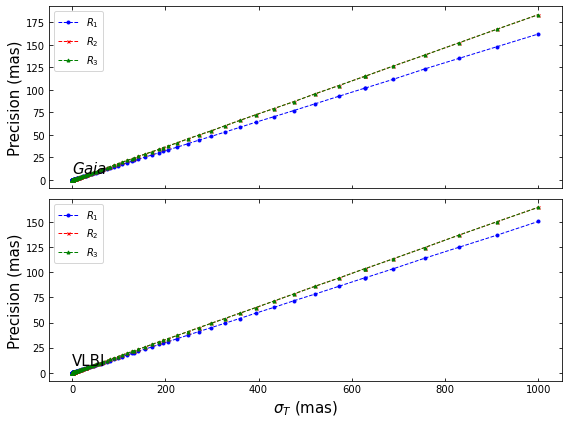

In [23]:
fig, (ax0, ax1) = plt.subplots(figsize=(8, 6), nrows=2, sharex=True)

ax0.plot(sigma, sigma_mat_g[:, 0], "b--o", ms=3, lw=1, label="$R_1$")
ax0.plot(sigma, sigma_mat_g[:, 1], "r--x", ms=3, lw=1, label="$R_2$")
ax0.plot(sigma, sigma_mat_g[:, 1], "g--^", ms=3, lw=1, label="$R_3$")

ax1.plot(sigma, sigma_mat_v[:, 0], "b--o", ms=3, lw=1, label="$R_1$")
ax1.plot(sigma, sigma_mat_v[:, 1], "r--x", ms=3, lw=1, label="$R_2$")
ax1.plot(sigma, sigma_mat_v[:, 1], "g--^", ms=3, lw=1, label="$R_3$")

# ax0.set_xscale("log")
# ax0.set_yscale("log")

# ax1.set_xscale("log")
# ax1.set_yscale("log")

ax0.legend()
ax1.legend()

ax1.set_xlabel("$\sigma_T$ (mas)", fontsize=15)

ax0.set_ylabel("Precision (mas)", fontsize=15)
ax1.set_ylabel("Precision (mas)", fontsize=15)

ax0.text(0.05, 7, "$Gaia$", fontsize=15)
ax1.text(0.05, 8, "VLBI", fontsize=15)

plt.tight_layout()

# plt.savefig("../plots/frame-tie-precision.eps")

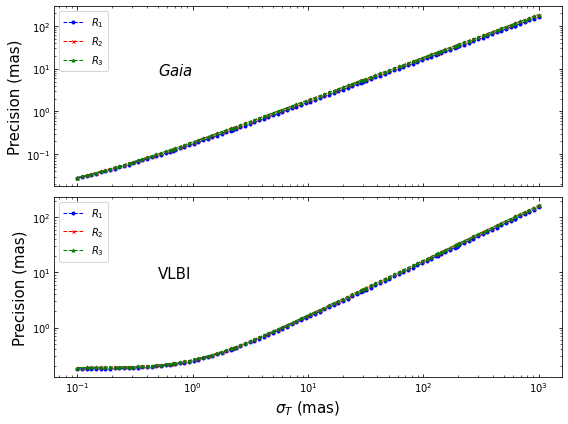

In [24]:
fig, (ax0, ax1) = plt.subplots(figsize=(8, 6), nrows=2, sharex=True)

ax0.plot(sigma, sigma_mat_g[:, 0], "b--o", ms=3, lw=1, label="$R_1$")
ax0.plot(sigma, sigma_mat_g[:, 1], "r--x", ms=3, lw=1, label="$R_2$")
ax0.plot(sigma, sigma_mat_g[:, 1], "g--^", ms=3, lw=1, label="$R_3$")

ax1.plot(sigma, sigma_mat_v[:, 0], "b--o", ms=3, lw=1, label="$R_1$")
ax1.plot(sigma, sigma_mat_v[:, 1], "r--x", ms=3, lw=1, label="$R_2$")
ax1.plot(sigma, sigma_mat_v[:, 1], "g--^", ms=3, lw=1, label="$R_3$")

ax0.set_xscale("log")
ax0.set_yscale("log")

ax1.set_xscale("log")
ax1.set_yscale("log")

ax0.legend()
ax1.legend()

ax1.set_xlabel("$\sigma_T$ (mas)", fontsize=15)

ax0.set_ylabel("Precision (mas)", fontsize=15)
ax1.set_ylabel("Precision (mas)", fontsize=15)

ax0.text(0.5, 7, "$Gaia$", fontsize=15)
ax1.text(0.5, 8, "VLBI", fontsize=15)

plt.tight_layout()

# plt.savefig("../plots/frame-tie-precision.eps")

In [25]:
yg_all = sigma_mat_g_max[sigma >= pos_err_all_g][0]
xg_all = sigma[sigma >= pos_err_all_g][0]

yg_msp = sigma_mat_g_max[sigma >= pos_err_msp_g][0]
xg_msp = sigma[sigma >= pos_err_msp_g][0]

yg_nmp = sigma_mat_g_max[sigma >= pos_err_nmp_g][0]
xg_nmp = sigma[sigma >= pos_err_nmp_g][0]

print("The closes point to the timing positional precision (mas) of Gaia pulsars")
print("          pos_err    rot_err")
print("All:      {:6.3f}    {:6.3f}".format(xg_all, yg_all))
print("MSP:      {:6.3f}    {:6.3f}".format(xg_msp, yg_msp))
print("Non-MSP:  {:6.3f}    {:6.3f}".format(xg_nmp, yg_nmp))

The closes point to the timing positional precision (mas) of Gaia pulsars
          pos_err    rot_err
All:      30.092     5.534
MSP:       2.256     0.423
Non-MSP:  627.651    114.989


In [26]:
yv_all = sigma_mat_v_max[sigma >= pos_err_all_v][0]
xv_all = sigma[sigma >= pos_err_all_v][0]

yv_msp = sigma_mat_v_max[sigma >= pos_err_msp_v][0]
xv_msp = sigma[sigma >= pos_err_msp_v][0]

yv_nmp = sigma_mat_v_max[sigma >= pos_err_nmp_v][0]
xv_nmp = sigma[sigma >= pos_err_nmp_v][0]

print("The closes point to the timing positional precision (mas) of VLBI pulsars")
print("          pos_err    rot_err")
print("All:      {:6.3f}    {:6.3f}".format(xv_all, yv_all))
print("MSP:      {:6.3f}    {:6.3f}".format(xv_msp, yv_msp))
print("Non-MSP:  {:6.3f}    {:6.3f}".format(xv_nmp, yv_nmp))

The closes point to the timing positional precision (mas) of VLBI pulsars
          pos_err    rot_err
All:      133.844    22.025
MSP:       0.678     0.243
Non-MSP:  195.170    32.168


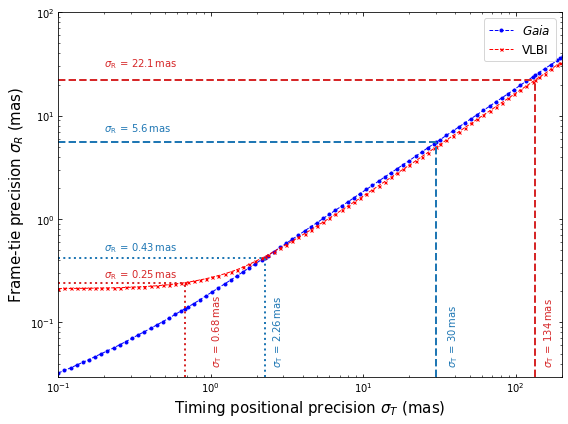

In [27]:
xmin, xmax, ymin, ymax = 0.1, 200, 0.03, 100

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(sigma, sigma_mat_g_max, "b--o", ms=3, lw=1, label="$Gaia$")
ax.plot(sigma, sigma_mat_v_max, "r--x", ms=3, lw=1, label="VLBI")

ax.set_xscale("log")
ax.set_yscale("log")

ax.hlines(yg_all, xmin, xg_all, ls="dashed", lw=2, color="tab:blue")
ax.vlines(xg_all, ymin, yg_all, ls="dashed", lw=2, color="tab:blue")

ax.hlines(yg_msp, xmin, xg_msp, ls="dotted", lw=2, color="tab:blue")
ax.vlines(xg_msp, ymin, yg_msp, ls="dotted", lw=2, color="tab:blue")

ax.hlines(yv_all, xmin, xv_all, ls="dashed", lw=2, color="tab:red")
ax.vlines(xv_all, ymin, yv_all, ls="dashed", lw=2, color="tab:red")

ax.hlines(yv_msp, xmin, xv_msp, ls="dotted", lw=2, color="tab:red")
ax.vlines(xv_msp, ymin, yv_msp, ls="dotted", lw=2, color="tab:red")

ax.text(0.2, 7, "$\sigma_{\\rm R}\,=\,5.6\,{\\rm mas}$",
        fontsize=10, color="tab:blue")
ax.text(35, 0.04, "$\sigma_{\\rm T}\,=\,30\,{\\rm mas}$",
        fontsize=10, color="tab:blue", rotation=90)

ax.text(0.2, 0.5, "$\sigma_{\\rm R}\,=\,0.43\,{\\rm mas}$",
        fontsize=10, color="tab:blue")
ax.text(2.5, 0.04, "$\sigma_{\\rm T}\,=\,2.26\,{\\rm mas}$",
        fontsize=10, color="tab:blue", rotation=90)

ax.text(0.2, 30, "$\sigma_{\\rm R}\,=\,22.1\,{\\rm mas}$",
        fontsize=10, color="tab:red")
ax.text(150, 0.04, "$\sigma_{\\rm T}\,=\,134\,{\\rm mas}$",
        fontsize=10, color="tab:red", rotation=90)

ax.text(0.2, 0.27, "$\sigma_{\\rm R}\,=\,0.25\,{\\rm mas}$",
        fontsize=10, color="tab:red")
ax.text(1, 0.04, "$\sigma_{\\rm T}\,=\,0.68\,{\\rm mas}$",
        fontsize=10, color="tab:red", rotation=90)

ax.legend(fontsize=12)

ax.set_xlabel("Timing positional precision $\sigma_T$ (mas)", fontsize=15)
ax.set_ylabel("Frame-tie precision $\sigma_R$ (mas)", fontsize=15)

ax.axis([xmin, xmax, ymin, ymax])

plt.tight_layout()

# plt.savefig("../plots/frame-tie-precision.eps")

In [28]:
yg_all = sigma_mat_g_tot[sigma >= pos_err_all_g][0]
xg_all = sigma[sigma >= pos_err_all_g][0]

yg_msp = sigma_mat_g_tot[sigma >= pos_err_msp_g][0]
xg_msp = sigma[sigma >= pos_err_msp_g][0]

yg_nmp = sigma_mat_g_tot[sigma >= pos_err_nmp_g][0]
xg_nmp = sigma[sigma >= pos_err_nmp_g][0]

print("The closes point to the timing positional precision (mas) of Gaia pulsars")
print("          pos_err    rot_err")
print("All:      {:6.3f}    {:6.3f}".format(xg_all, yg_all))
print("MSP:      {:6.3f}    {:6.3f}".format(xg_msp, yg_msp))
print("Non-MSP:  {:6.3f}    {:6.3f}".format(xg_nmp, yg_nmp))


yv_all = sigma_mat_v_tot[sigma >= pos_err_all_v][0]
xv_all = sigma[sigma >= pos_err_all_v][0]

yv_msp = sigma_mat_v_tot[sigma >= pos_err_msp_v][0]
xv_msp = sigma[sigma >= pos_err_msp_v][0]

yv_nmp = sigma_mat_v_tot[sigma >= pos_err_nmp_v][0]
xv_nmp = sigma[sigma >= pos_err_nmp_v][0]

print("The closes point to the timing positional precision (mas) of VLBI pulsars")
print("          pos_err    rot_err")
print("All:      {:6.3f}    {:6.3f}".format(xv_all, yv_all))
print("MSP:      {:6.3f}    {:6.3f}".format(xv_msp, yv_msp))
print("Non-MSP:  {:6.3f}    {:6.3f}".format(xv_nmp, yv_nmp))

The closes point to the timing positional precision (mas) of Gaia pulsars
          pos_err    rot_err
All:      30.092     9.153
MSP:       2.256     0.700
Non-MSP:  627.651    190.675
The closes point to the timing positional precision (mas) of VLBI pulsars
          pos_err    rot_err
All:      133.844    35.981
MSP:       0.678     0.393
Non-MSP:  195.170    52.492


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


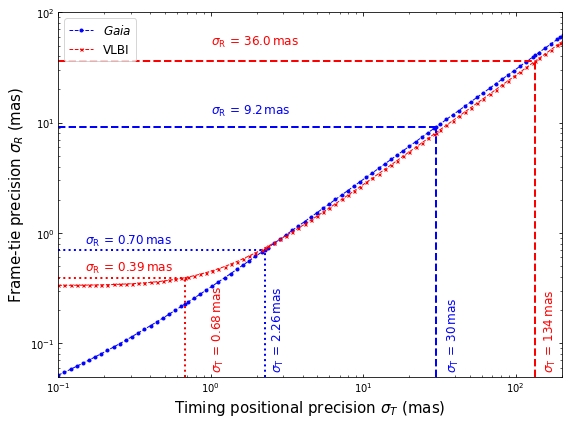

In [32]:
xmin, xmax, ymin, ymax = 0.1, 200, 0.05, 100

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(sigma, sigma_mat_g_tot, "b--o", ms=3, lw=1, label="$Gaia$")
ax.plot(sigma, sigma_mat_v_tot, "r--x", ms=3, lw=1, label="VLBI")

ax.set_xscale("log")
ax.set_yscale("log")

ax.hlines(yg_all, xmin, xg_all, ls="dashed", lw=2, color="blue")
ax.vlines(xg_all, ymin, yg_all, ls="dashed", lw=2, color="blue")

ax.hlines(yg_msp, xmin, xg_msp, ls="dotted", lw=2, color="blue")
ax.vlines(xg_msp, ymin, yg_msp, ls="dotted", lw=2, color="blue")

ax.hlines(yv_all, xmin, xv_all, ls="dashed", lw=2, color="red")
ax.vlines(xv_all, ymin, yv_all, ls="dashed", lw=2, color="red")

ax.hlines(yv_msp, xmin, xv_msp, ls="dotted", lw=2, color="red")
ax.vlines(xv_msp, ymin, yv_msp, ls="dotted", lw=2, color="red")


ax.text(1, 12, "$\sigma_{\\rm R}\,=\,9.2\,{\\rm mas}$",
        fontsize=12, color="blue")
ax.text(35, 0.06, "$\sigma_{\\rm T}\,=\,30\,{\\rm mas}$",
        fontsize=12, color="blue", rotation=90)

ax.text(0.15, 0.8, "$\sigma_{\\rm R}\,=\,0.70\,{\\rm mas}$",
        fontsize=12, color="blue")
ax.text(2.5, 0.06, "$\sigma_{\\rm T}\,=\,2.26\,{\\rm mas}$",
        fontsize=12, color="blue", rotation=90)

ax.text(1, 50, "$\sigma_{\\rm R}\,=\,36.0\,{\\rm mas}$",
        fontsize=12, color="red")
ax.text(150, 0.06, "$\sigma_{\\rm T}\,=\,134\,{\\rm mas}$",
        fontsize=12, color="red", rotation=90)

ax.text(0.15, 0.45, "$\sigma_{\\rm R}\,=\,0.39\,{\\rm mas}$",
        fontsize=12, color="red")
ax.text(1, 0.06, "$\sigma_{\\rm T}\,=\,0.68\,{\\rm mas}$",
        fontsize=12, color="red", rotation=90)

ax.legend(fontsize=12)

ax.set_xlabel("Timing positional precision $\sigma_T$ (mas)", fontsize=15)
ax.set_ylabel("Frame-tie precision $\sigma_R$ (mas)", fontsize=15)

ax.axis([xmin, xmax, ymin, ymax])

plt.tight_layout()

plt.savefig("../plots/frame-tie-precision.eps")